 # 515 K Hotel Reviews Database Analysis

## Overview

This dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe.

The csv file contains 17 fields. The description of each field is as below:

<br>Hotel_Address: Address of hotel.
<br>Review_Date: Date when reviewer posted the corresponding review.
<br>Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
<br>Hotel_Name: Name of Hotel
<br>Reviewer_Nationality: Nationality of Reviewer
<br>Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
<br>Review_Total_Negative_Word_Counts: Total number of words in the negative review.
<br>Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
<br>Review_Total_Positive_Word_Counts: Total number of words in the positive review.
<br>Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
<br>Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.
<br>Total_Number_of_Reviews: Total number of valid reviews the hotel has.
<br>Tags: Tags reviewer gave the hotel.
days_since_review: Duration between the review date and scrape date.
<br>Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
<br>lat: Latitude of the hotel
<br>lng: longtitude of the hotel

### Import from MS SQL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pyodbc 
cnxn = pyodbc.connect('Driver={SQL Server};'
                      'Server=IVAN-PC\SQLEXPRESS;'
                      'Database=HotelReviews;'
                      'Trusted_Connection=yes;')



In [2]:
query = 'SELECT * FROM dbo.Hotel_Reviews'

df = pd.read_sql(query, cnxn)

df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,No Negative,0,6117,Very clean and central hotel heart of London ...,19,3,9.2,"""[' Leisure trip '",' Family with young children ',' 2 rooms ',"' Stayed 2 nights ', ' Submitted from a mobil..."
1,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,In our first room the sofa bed was broken but...,18,6117,Excellent customer service Rooms are very nice,9,2,9.6,"""[' Leisure trip '",' Family with young children ',' Studio Double Family ',"' Stayed 1 night ', ' Submitted from a mobile..."
2,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,Kuwait,Breakfast very stressful experience,5,6117,Great location,3,1,7.5,"""[' Leisure trip '",' Couple ',' Studio Double Family ',"' Stayed 4 nights ', ' Submitted from a mobil..."
3,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,No Negative,0,6117,staff very helpfull and friendly got upgrade ...,16,1,10.0,"""[' Leisure trip '",' Family with older children ',' Superior Twin Room ',"' Stayed 1 night ']"",337 day,51.5014001,-0.11..."
4,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-30,8.4,Park Plaza County Hall London,United Kingdom,Asked for quiet room however we were next to ...,17,6117,Location,2,1,6.7,"""[' Leisure trip '",' Group ',' Studio Double Room ',"' Stayed 1 night ', ' Submitted from a mobile..."


In [3]:
# Number of reviews
len(df)

515738

### Data Cleaning

In [4]:
# Removing duplicates from the dataset
print(sum(df.duplicated()))
df = df.drop_duplicates()
print('After removing Duplicates: {}'.format(df.shape))

526
After removing Duplicates: (515212, 17)


In [5]:
# Removing blank spaces, they were causing trouble later (nationalities of interest)
print(df.Reviewer_Nationality.values)

df.Reviewer_Nationality = df.Reviewer_Nationality.str.strip() 

[' United Kingdom ' ' United Kingdom ' ' Kuwait ' ... ' Bulgaria '
 ' Russia ' ' United Kingdom ']


In [6]:
# New column with hotel countries, taken from: https://www.kaggle.com/ollief/quick-analysis-of-effects-on-score
def country_column(st):
    last = st.split()[-1]
    if last == "Kingdom": return "United Kingdom"
    else: return last
    
df["Hotel_Country"] = df["Hotel_Address"].apply(country_column)

In [7]:
# View first five rows of the table with an added column "Hotel Country"
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,No Negative,0,6117,Very clean and central hotel heart of London ...,19,3,9.2,"""[' Leisure trip '",' Family with young children ',' 2 rooms ',"' Stayed 2 nights ', ' Submitted from a mobil...",United Kingdom
1,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,In our first room the sofa bed was broken but...,18,6117,Excellent customer service Rooms are very nice,9,2,9.6,"""[' Leisure trip '",' Family with young children ',' Studio Double Family ',"' Stayed 1 night ', ' Submitted from a mobile...",United Kingdom
2,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,Kuwait,Breakfast very stressful experience,5,6117,Great location,3,1,7.5,"""[' Leisure trip '",' Couple ',' Studio Double Family ',"' Stayed 4 nights ', ' Submitted from a mobil...",United Kingdom
3,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-31,8.4,Park Plaza County Hall London,United Kingdom,No Negative,0,6117,staff very helpfull and friendly got upgrade ...,16,1,10.0,"""[' Leisure trip '",' Family with older children ',' Superior Twin Room ',"' Stayed 1 night ']"",337 day,51.5014001,-0.11...",United Kingdom
4,1 Addington Street Lambeth London SE1 7RY Unit...,1322,2016-08-30,8.4,Park Plaza County Hall London,United Kingdom,Asked for quiet room however we were next to ...,17,6117,Location,2,1,6.7,"""[' Leisure trip '",' Group ',' Studio Double Room ',"' Stayed 1 night ', ' Submitted from a mobile...",United Kingdom


In [8]:
# display all columns after adding "Hotel_Country" column
for x in df.columns:
    print(x)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng
Hotel_Country


### General descriptive statistics

In [9]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
count,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000
mean,498.416021,8.397767,18.540822,2744.698889,17.778256,7.164895,8.395532
std,500.668595,0.547952,29.693991,2318.090821,21.804541,11.039354,1.637467
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000


### 10 Nationalities that gave most reviews

In [10]:
print("10 Nationalities with most given reviews:")

df.Reviewer_Nationality.value_counts()[:10] 

10 Nationalities with most given reviews:


United Kingdom              245110
United States of America     35349
Australia                    21648
Ireland                      14814
United Arab Emirates         10229
Saudi Arabia                  8940
Netherlands                   8757
Switzerland                   8669
Germany                       7929
Canada                        7883
Name: Reviewer_Nationality, dtype: int64

### 10 most reviewed Hotels

In [11]:
print("10 most reviewed Hotels:")

df.Hotel_Name.value_counts()[:10]

10 most reviewed Hotels:


Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64

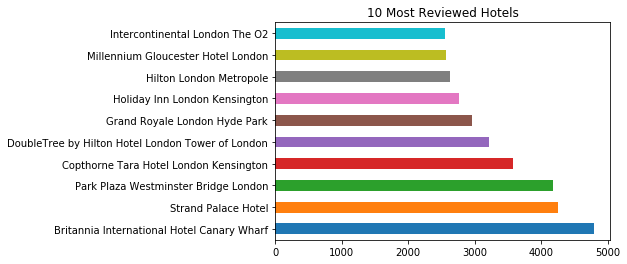

In [12]:
df.Hotel_Name.value_counts()[:10].plot.barh(title = "10 Most Reviewed Hotels")

### 10 best Hotels by Reviewer Score

In [13]:
df.groupby("Hotel_Name")['Reviewer_Score'].mean().sort_values(ascending=False)[:10]

Hotel_Name
Ritz Paris                             9.725000
Hotel Casa Camper                      9.718937
41                                     9.711651
H tel de La Tamise Esprit de France    9.688525
Le Narcisse Blanc Spa                  9.671930
H10 Casa Mimosa 4 Sup                  9.660345
Hotel Eiffel Blomet                    9.646667
Hotel The Serras                       9.623474
45 Park Lane Dorchester Collection     9.603572
The Soho Hotel                         9.597452
Name: Reviewer_Score, dtype: float64

### Filtering positive and negative reviews

In [14]:
# Number of reviews
len(df) 

515212

In [15]:
# Filtering only reviews that are positive
df_positive = df[(df.Positive_Review != "No Positive") & (df.Review_Total_Negative_Word_Counts == 0)]

In [16]:
# Number of positive reviews
len(df_positive)

127630

In [17]:
# Positive review mean
df_positive.Reviewer_Score.mean() 

9.339746221380436

In [18]:
# Filtering only reviews that are negative
df_negative = df[(df.Negative_Review != "No Negative") & (df.Review_Total_Positive_Word_Counts == 0)]

In [19]:
# Number of negative reviews
len(df_negative) 

35777

In [20]:
# Negative review mean
df_negative.Reviewer_Score.mean() 

6.882390953720984

### 10 most positive nations (by given reviews)

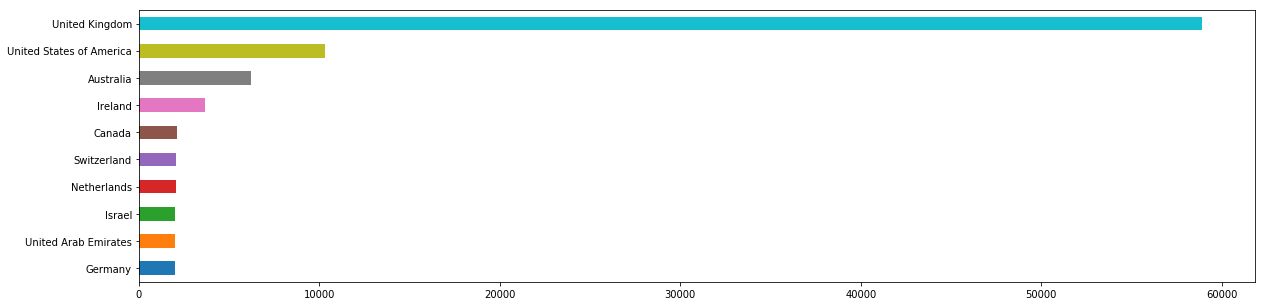

In [21]:
positive_reviewers = df_positive["Reviewer_Nationality"].value_counts()[:10]

positive_reviewers.sort_values().plot.barh(figsize=(20,5))

### 10 most negative nations (by given reviews)

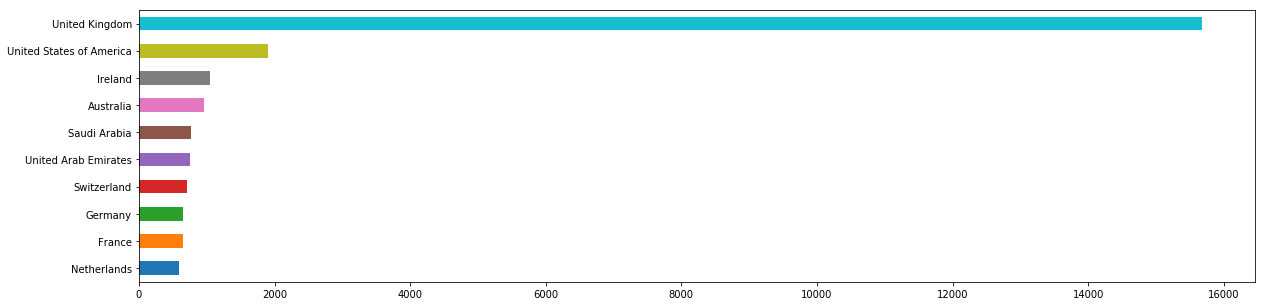

In [22]:
# Top 10 negative reviewer scores grouped by nationalities 
negative_reviewers = df_negative["Reviewer_Nationality"].value_counts()[:10]

negative_reviewers.sort_values().plot.barh(figsize=(20,5))

### Reviews that were above average

In [23]:
# Average number of given reviews
df.Total_Number_of_Reviews_Reviewer_Has_Given.mean()

7.164895227595631

In [24]:
reviewers_above_mean = df[df.Total_Number_of_Reviews_Reviewer_Has_Given > df.Total_Number_of_Reviews_Reviewer_Has_Given.mean()]

In [25]:
# Number of above average reviews
len(reviewers_above_mean)

143106

### Separating above average reviews from nationalities where the reviewed Hotels are located

In [26]:
nationalities_of_interest = ['United Kingdom', 'Spain', 'France', 'Netherlands', 'Austria', 'Italy']

mean_scores_nationality = reviewers_above_mean.groupby("Reviewer_Nationality")["Reviewer_Score"].mean().sort_values(ascending=False)

rev_score_positive_reviewers = mean_scores_nationality[nationalities_of_interest]

rev_score_positive_reviewers

Reviewer_Nationality
United Kingdom    8.510245
Spain             8.228687
France            8.249621
Netherlands       8.272332
Austria           8.483729
Italy             8.183345
Name: Reviewer_Score, dtype: float64

### Hotel Country Stats

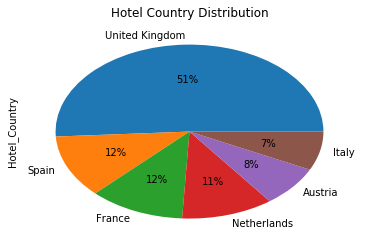

In [27]:
df["Hotel_Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', title = "Hotel Country Distribution")

plt.show()

In [28]:
group_by_country = df.groupby("Hotel_Country")

positive_by_country = df_positive.groupby("Hotel_Country")
negative_by_country = df_negative.groupby("Hotel_Country")

In [29]:
average_rev = group_by_country.mean()['Average_Score']
average_rev_score = group_by_country.mean()['Reviewer_Score']
standard_deviation = group_by_country.std()['Reviewer_Score']

positive_reviews = positive_by_country.count()['Positive_Review']
negative_reviews = negative_by_country.count()['Negative_Review']

In [30]:
average_rev.name = 'average_review'
average_rev_score.name = 'average_score'
standard_deviation.name = 'standard_deviation'
positive_reviews.name = 'positive_reviews'
negative_reviews.name = 'negative_reviews'

In [31]:
Hotel_Country_Stats = pd.concat([average_rev_score, average_rev, standard_deviation, positive_reviews, negative_reviews], axis=1)

In [32]:
# Hotel Countries ranked by Reviewer Score and displaying the number of positive and negative reviews of their Hotels
Hotel_Country_Stats.sort_values(by='average_score', ascending=False)

,average_score,average_review,standard_deviation,positive_reviews,negative_reviews
Hotel_Country,,,,,
Spain,8.554092,8.522812,1.554202,15949,3549
Austria,8.545037,8.558050,1.511625,10840,2557
Netherlands,8.456231,8.387100,1.599051,14260,3800
France,8.424395,8.411583,1.652847,16480,3748
Italy,8.346678,8.426718,1.648622,9946,2553
United Kingdom,8.324130,8.340390,1.672142,60155,19570


### Comparing average Review Score of Hotels by their location Country and average Review Score of matching nationalities - checking for Country/Nationality Bias

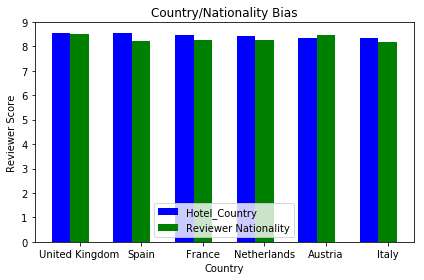

In [33]:
# Data sources

n_groups = 6
rev_score_hotel_countries = df.groupby("Hotel_Country")["Reviewer_Score"].mean().sort_values(ascending=False)
rev_score_positive_reviewers
 
# Plot settings
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1.0
 
bar1 = plt.bar(index, rev_score_hotel_countries, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Hotel_Country')
 
bar2 = plt.bar(index + bar_width, rev_score_positive_reviewers, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Reviewer Nationality')
 
plt.xlabel('Country')
plt.ylabel('Reviewer Score')
plt.title('Country/Nationality Bias')
plt.xticks(index + bar_width, ('United Kingdom', 'Spain', 'France', 'Netherlands', 'Austria', 'Italy'))
plt.legend()
 
plt.tight_layout() # keeps the legend centered
plt.show()